# Section 9.1. Combining job scheduling and load balancing

# Céline Comte

This Notebook plots the numerical results for Section 9.1 of the Ph.D. thesis *Resource management in computer clusters: algorithm design and performance analysis* by Céline Comte.

## Package imports and global variable definitions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# uncomment this line if you prefer dynamic matplotlib plots
# %matplotlib notebook

# change the default figure size
# pylab.rcParams['figure.figsize'] = (10.0, 6.0)
pylab.rcParams['legend.fontsize'] = 12

In [3]:
# manipulate dataframes
import pandas as pd

In [4]:
# useful in the function dynamic
from scipy import special

In [5]:
# global variables
ρρ = linspace(5., 0, 10000, endpoint=False)

## Results

In [6]:
# load external results
no_parallelization = pd.read_csv('../8-load-balancing/data/single-dynamic-exact.csv')
parallelization_degree_3 = pd.read_csv('data/single-dynamic-exact-3.csv')
parallelization_degree_4 = pd.read_csv('data/single-dynamic-exact-4.csv')
parallelization_degree_5 = pd.read_csv('data/single-dynamic-exact-5.csv')

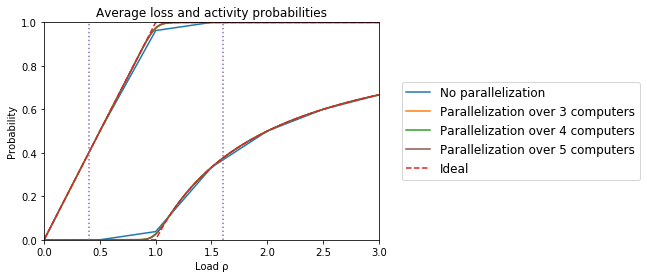

In [7]:
# average loss and activity probability
figure()

# dynamic
plot(no_parallelization['rho'], no_parallelization['beta'], 'C0', label="No parallelization")
plot(no_parallelization['rho'], no_parallelization['eta'], 'C0', label="")

# dynamic with 2 pooled computers
plot(parallelization_degree_3['rho'], parallelization_degree_3['beta'],
     'C1', label="Parallelization over 3 computers")
plot(parallelization_degree_3['rho'], parallelization_degree_3['eta'], 'C1', label="")

# dynamic with 2 pooled computers
plot(parallelization_degree_4['rho'], parallelization_degree_4['beta'],
     'C2', label="Parallelization over 4 computers")
plot(parallelization_degree_4['rho'], parallelization_degree_4['eta'], 'C2', label="")

# dynamic with 2 pooled computers
plot(parallelization_degree_5['rho'], parallelization_degree_5['beta'],
     'C5', label="Parallelization over 5 computers")
plot(parallelization_degree_5['rho'], parallelization_degree_5['eta'], 'C5', label="")

# ideal
plot(ρρ, maximum(0, 1. - 1. / ρρ), 'C3--', label="Ideal")
plot(ρρ, minimum(1, ρρ), 'C3--')

# references
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc=6, bbox_to_anchor=(1.05, .5))
xlabel("Load ρ"); ylabel("Probability")
title("Average loss and activity probabilities")
show()

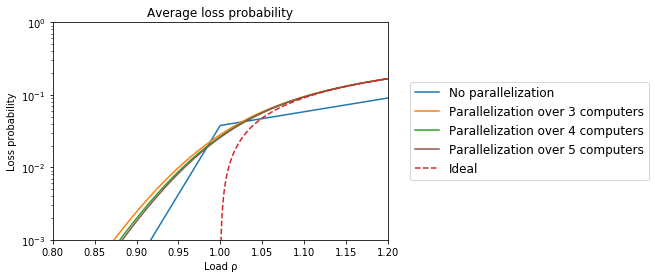

In [8]:
# average loss and activity probability
figure()

# dynamic
semilogy(no_parallelization['rho'], no_parallelization['beta'], 'C0',
         label="No parallelization")

# dynamic with 3 pooled computers
semilogy(parallelization_degree_3['rho'], parallelization_degree_3['beta'], 'C1',
         label="Parallelization over 3 computers")

# dynamic with 4 pooled computers
semilogy(parallelization_degree_4['rho'], parallelization_degree_4['beta'], 'C2',
         label="Parallelization over 4 computers")

# dynamic with 5 pooled computers
semilogy(parallelization_degree_5['rho'], parallelization_degree_5['beta'], 'C5',
         label="Parallelization over 5 computers")

# ideal
semilogy(ρρ, maximum(0, 1. - 1. / ρρ), 'C3--', label="Ideal")

# reference
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0.8, 1.2); ylim(0.001, 1)
legend(loc=6, bbox_to_anchor=(1.05, .5))
xlabel("Load ρ"); ylabel("Loss probability")
title("Average loss probability")
show()

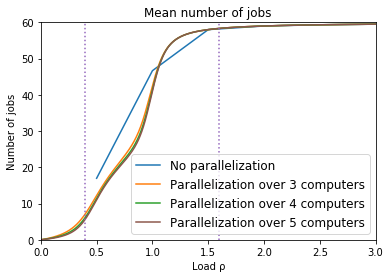

In [9]:
# mean number of jobs
figure()

# exact
plot(no_parallelization['rho'], no_parallelization['L'],
     'C0', label="No parallelization")
plot(parallelization_degree_3['rho'], parallelization_degree_3['L'],
     'C1', label="Parallelization over 3 computers")
plot(parallelization_degree_4['rho'], parallelization_degree_4['L'],
     'C2', label="Parallelization over 4 computers")
plot(parallelization_degree_5['rho'], parallelization_degree_5['L'],
     'C5', label="Parallelization over 5 computers")

# reference
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 60)
legend(loc='best')
title("Mean number of jobs")
xlabel("Load ρ"); ylabel("Number of jobs")
show()

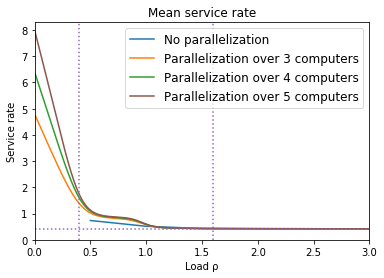

In [10]:
# mean service rate
figure()

# exact
plot(no_parallelization['rho'], no_parallelization['gamma'], 'C0',
     label="No parallelization")
plot(parallelization_degree_3['rho'], parallelization_degree_3['gamma'], 'C1',
     label="Parallelization over 3 computers")
plot(parallelization_degree_4['rho'], parallelization_degree_4['gamma'], 'C2',
     label="Parallelization over 4 computers")
plot(parallelization_degree_5['rho'], parallelization_degree_5['gamma'], 'C5',
     label="Parallelization over 5 computers")

# reference
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')
axhline(y=2.5/6, color='C4', linestyle=':')

xlim(0, 3); ylim(ymin = 0)
legend(loc='best')
xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate")
show()